In [16]:
# import all required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [17]:
pisa = pd.read_csv('pisa2009.csv')
print('Shape of data set: ',pisa.shape)

('Shape of data set: ', (5233, 24))


### Impute Missing Values

In [18]:
print('Missing values in data set:', pisa.isnull().sum().sum())


('Missing values in data set:', 4329L)


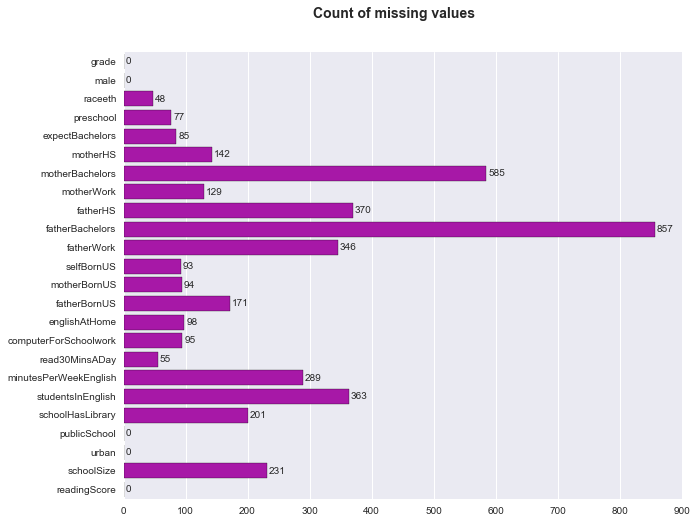

In [19]:
fig = plt.figure(figsize=(10, 8))
fig.suptitle('Count of missing values', fontsize=14, fontweight='bold')
null_data = pisa.isnull().sum()
ax = sns.barplot(x = null_data.values, y=null_data.index, color="m" )
i = 0
for p in ax.patches:
    width = p.get_width()
    ax.text(width + 3, p.get_y() + 0.5, null_data.values[i])
    i += 1

In [20]:
# For continuous variables replace the missing data with average of columns
pisa['minutesPerWeekEnglish'].fillna(int(pisa['minutesPerWeekEnglish'].mean()), inplace=True)
pisa['studentsInEnglish'].fillna(int(pisa['studentsInEnglish'].mean()), inplace=True)
pisa['schoolSize'].fillna(int(pisa['schoolSize'].mean()), inplace=True)

# For 'raceeth' use 'missing' replacement
pisa['raceeth'].fillna('NoRace', inplace=True)
# For binary variable use 0.5 in place of missing value

pisa = pisa.apply(lambda x:x.fillna(0.5))

### Encode categorical values

In [21]:
raceeth = pd.get_dummies(pisa['raceeth'], 'raceeth')
pisa = pd.concat([pisa, raceeth], axis=1)
pisa = pisa.drop('raceeth', axis=1)

### Multicollinearity

In [22]:
# show correlations above 0.5
corr = pisa.corr(method='pearson')
indices = np.where(corr > 0.5)
indices = [(corr.index[x], corr.columns[y]) for x, y in zip(*indices)
                                        if x != y and x < y]
indices

[('motherBachelors', 'fatherBachelors'),
 ('motherBornUS', 'fatherBornUS'),
 ('motherBornUS', 'englishAtHome'),
 ('fatherBornUS', 'englishAtHome')]

In [25]:
pisa[['motherBachelors', 'fatherBachelors', 'motherBornUS', 'fatherBornUS', 'englishAtHome', 'readingScore']].corr(method='pearson')

,motherBachelors,fatherBachelors,motherBornUS,fatherBornUS,englishAtHome,readingScore
motherBachelors,1.000000,0.511168,0.125093,0.105369,0.149001,0.179857
fatherBachelors,0.511168,1.000000,0.055669,0.057011,0.111071,0.206861
motherBornUS,0.125093,0.055669,1.000000,0.782097,0.645415,0.072332
fatherBornUS,0.105369,0.057011,0.782097,1.000000,0.619584,0.096699
englishAtHome,0.149001,0.111071,0.645415,0.619584,1.000000,0.131915
readingScore,0.179857,0.206861,0.072332,0.096699,0.131915,1.000000


In [8]:
# remove multicolinearity above 0.5, keeping ones with better correlatin with target
# fatherBachelors - keep
# englishAtHome - keep
# motherBachelors - remove
# motherBornUS - remove
# fatherBornUS - remove


pisa = pisa.drop(['motherBachelors','motherBornUS', 'fatherBornUS'], axis=1)

### Transformations

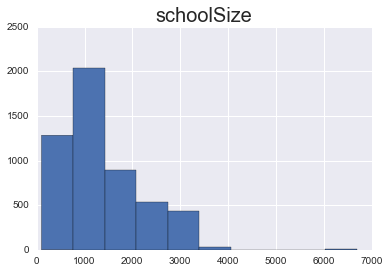

In [9]:
pisa['schoolSize'].hist()
plt.title('schoolSize', fontsize=20)

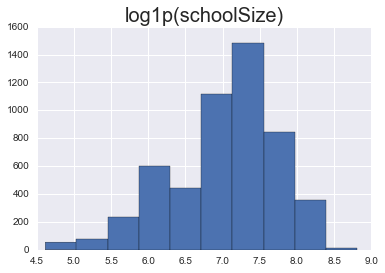

In [10]:
np.log1p(pisa['schoolSize']).hist()
plt.title('log1p(schoolSize)', fontsize=20)

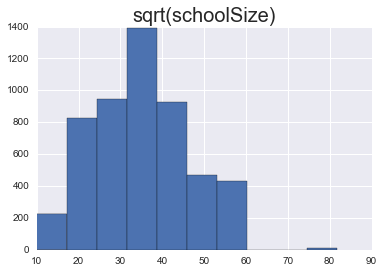

In [11]:
np.sqrt(pisa['schoolSize']).hist()
plt.title('sqrt(schoolSize)', fontsize=20)

In [26]:
pisa['schoolSize'] = np.log1p(pisa['schoolSize'])

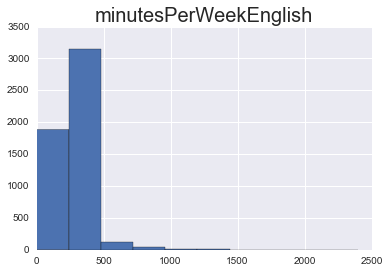

In [12]:
pisa['minutesPerWeekEnglish'].hist()
plt.title('minutesPerWeekEnglish', fontsize=20)

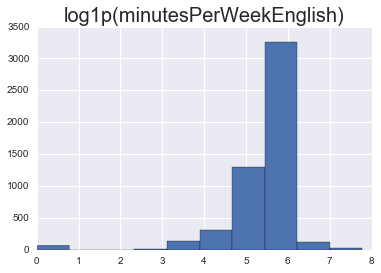

In [13]:
np.log1p(pisa['minutesPerWeekEnglish']).hist()
plt.title('log1p(minutesPerWeekEnglish)', fontsize=20)

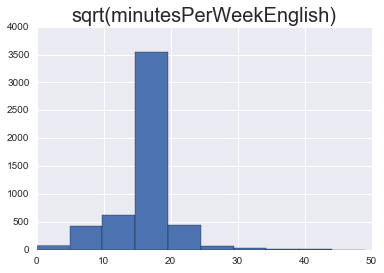

In [14]:
np.sqrt(pisa['minutesPerWeekEnglish']).hist()
plt.title('sqrt(minutesPerWeekEnglish)', fontsize=20)

In [27]:
pisa['minutesPerWeekEnglish'] = np.sqrt(pisa['minutesPerWeekEnglish'])

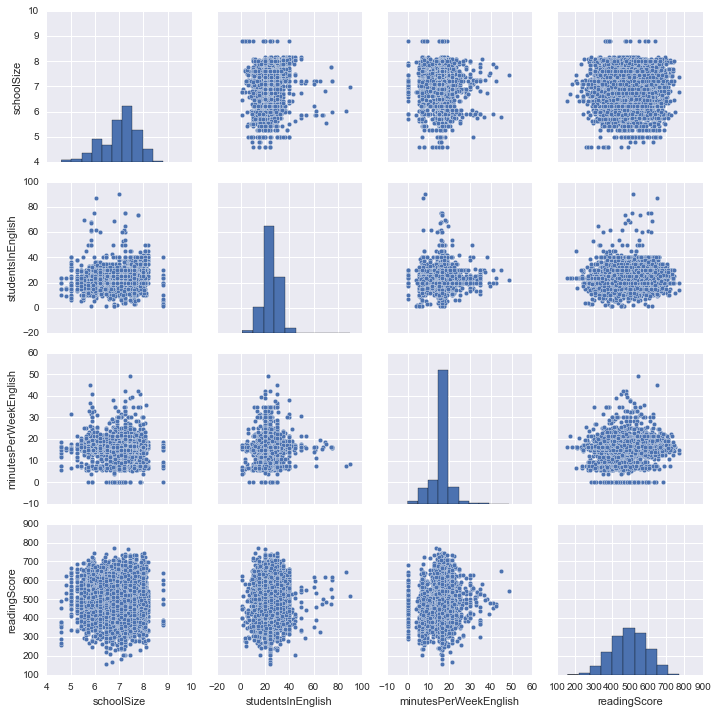

In [29]:
_ = sns.pairplot(pisa[['schoolSize','studentsInEnglish','minutesPerWeekEnglish','readingScore']])